This notebook is for generating color images using HSC broad-band and Merian medium-band images.

The code is basically using the 'multicolorfits' package from: https://github.com/pjcigan/multicolorfits

In [1]:
import numpy as np
import multicolorfits as mcf
import numpy as np
from astropy.io import fits
from astropy import coordinates as coords
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['text.usetex'] = True

In [2]:
### Load the data, images will be cropped later
gal_gdat,gal_ghdr=fits.getdata('./cutout-HSC-G-9813-pdr3_dud-211110-054122.fits',header=True)
gal_rdat,gal_rhdr=fits.getdata('./cutout-HSC-R-9813-pdr3_dud-211110-054129.fits',header=True)
gal_idat,gal_ihdr=fits.getdata('./cutout-HSC-I-9813-pdr3_dud-211110-054138.fits',header=True)
gal_zdat,gal_zhdr=fits.getdata('./cutout-HSC-Z-9813-pdr3_dud-211110-054231.fits',header=True)
gal_ydat,gal_yhdr=fits.getdata('./cutout-HSC-Y-9813-pdr3_dud-211110-054240.fits',header=True)
gal_N708dat,gal_N708hdr=fits.getdata(
    '/Users/yifei/Dropbox/merian/Merian_data/COSMOS/deep/c4d_210306_011257_osj_N708_deep.fits',header=True)

In [3]:
#This particular header lost its RADESYS card somewhere along the way.  
#Add it back in manually to enable correct coordinate calculations.
#Add the missing RA/DEC system to enable coord conversion
#In the COSMOS stack from Frank the relevent coords columns are RADESYS, CDELT1 and CDELT2,
#stacks from Lee might be different
gal_N708hdr=mcf.force_hdr_to_2D(gal_N708hdr) 
gal_N708hdr['RADESYS']='FK5' 
gal_N708hdr['CDELT1']=gal_N708hdr['CD1_1']
gal_N708hdr['CDELT2']=gal_N708hdr['CD2_2']

In [4]:
#cropcenter_coords=mcf.sex2dec('0:01:57.796','-15:28:17.127') or specify directly in decimal:
#could also just get the coords from a pixel location: cropcenter_coords=mcf.convpix2sky(gal_ihdr_simple,64,64)
cropcenter_coords = [150.574340, 1.856750]
#width in arcsec to extend in either direction from the reference coords (i.e., half-width) 
cropwidth_asec=30.
#There might be issues if there is a very bright object in the cropped images, so don't make the cropwidth too large

In [5]:
# Crop the images based on the i-band coords system
gal_ihdr_simple=mcf.makesimpleheader(gal_ihdr,radesys='FK5')
gal_icropdat,gal_icrophdr=mcf.cropfits2D_coords(gal_idat, gal_ihdr_simple, 
        cropcenter_coords, cropwidth_asec, savenew='./gal_icrop.fits', overwrite=True)
ref_crop = gal_icrophdr

gal_gcropdat=mcf.reproject2D(gal_gdat,mcf.makesimpleheader(gal_ghdr),ref_crop);
fits.writeto('./gal_gcrop.fits',gal_gcropdat,ref_crop,overwrite=True)

gal_rcropdat=mcf.reproject2D(gal_rdat,mcf.makesimpleheader(gal_rhdr),ref_crop);
fits.writeto('./gal_rcrop.fits',gal_rcropdat,ref_crop,overwrite=True)

gal_zcropdat=mcf.reproject2D(gal_zdat,mcf.makesimpleheader(gal_zhdr),ref_crop);
fits.writeto('./gal_zcrop.fits',gal_zcropdat,ref_crop,overwrite=True)

gal_ycropdat=mcf.reproject2D(gal_ydat,mcf.makesimpleheader(gal_yhdr),ref_crop);
fits.writeto('./gal_ycrop.fits',gal_ycropdat,ref_crop,overwrite=True)

gal_N708cropdat=mcf.reproject2D(gal_N708dat,mcf.makesimpleheader(gal_N708hdr),ref_crop);
fits.writeto('./gal_N708crop.fits',gal_N708cropdat,ref_crop,overwrite=True)

In [6]:
#Adjust the rescalefn, min_max_scale and gamma to get the best image
#rescalefn: log, linear, sqrt, asinh, squared, etc.
rescalefn = 'log'
#scaletype can be perc(entage) or abs(olute)
min_max_scale = [0.01,99.99]
gamma = 8

g_greyRGB=mcf.greyRGBize_image(gal_gcropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False) 

r_greyRGB=mcf.greyRGBize_image(gal_rcropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False)

i_greyRGB=mcf.greyRGBize_image(gal_icropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False)

z_greyRGB=mcf.greyRGBize_image(gal_zcropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False)

y_greyRGB=mcf.greyRGBize_image(gal_ycropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False)

N708_greyRGB=mcf.greyRGBize_image(gal_N708cropdat, rescalefn=rescalefn, scaletype='perc', 
                                min_max=min_max_scale, gamma=gamma, checkscale=False)

In [7]:
gammacorr_color = gamma - 2
g_blue=mcf.colorize_image(g_greyRGB, '#2e0af7', colorintype='hex', gammacorr_color=gammacorr_color)
r_cyan=mcf.colorize_image(r_greyRGB, '#07f7eb', colorintype='hex', gammacorr_color=gammacorr_color)
i_green=mcf.colorize_image(i_greyRGB, '#2beb05', colorintype='hex', gammacorr_color=gammacorr_color)
z_yellow=mcf.colorize_image(z_greyRGB, '#f5a105', colorintype='hex', gammacorr_color=gammacorr_color)
y_red=mcf.colorize_image(y_greyRGB, '#f54905', colorintype='hex', gammacorr_color=gammacorr_color)
N708_red=mcf.colorize_image(N708_greyRGB, '#f01307', colorintype='hex', gammacorr_color=gammacorr_color)

gal_merian=mcf.combine_multicolor([N708_red,y_red,z_yellow,i_green,r_cyan,g_blue],gamma=gammacorr_color)
gal_5band=mcf.combine_multicolor([y_red,z_yellow,i_green,r_cyan,g_blue],gamma=gammacorr_color)

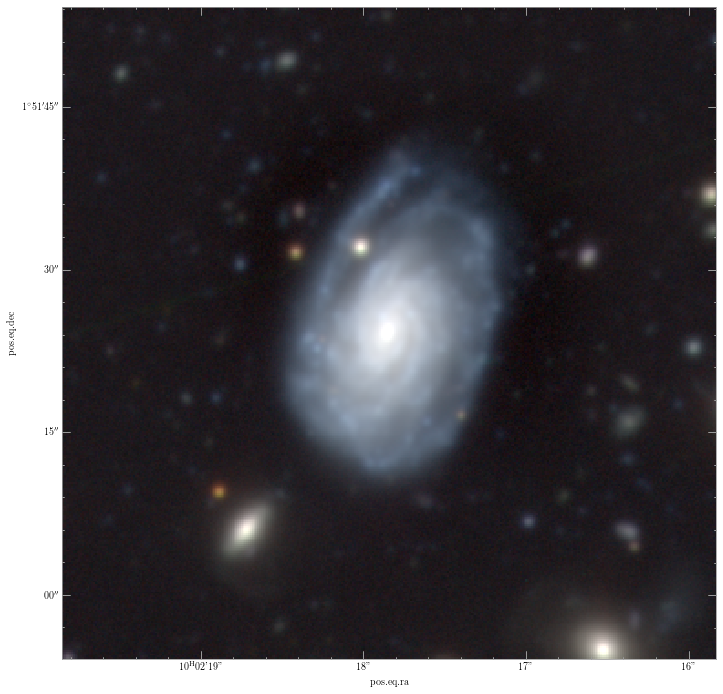

In [8]:
#Generate the color image with HSC 5-band data only
mcf.plotsinglemulticolorRGB(gal_5band, gal_icrophdr, ' ', './gal_5bandplot.jpg',
                            tickcolor='0.6', labelcolor='k', facecolor='w', minorticks=True, dpi=300)

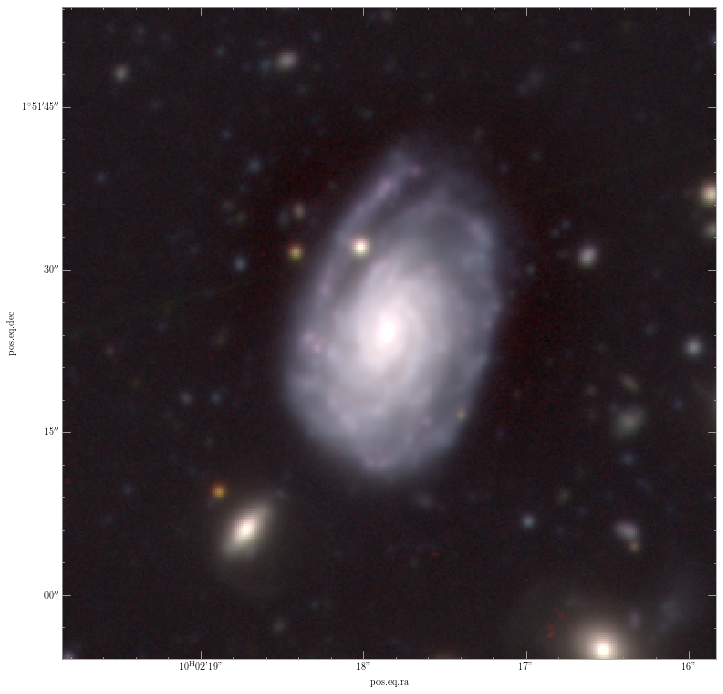

In [9]:
#Generate the color image with HSC 5-band and Merian N708
mcf.plotsinglemulticolorRGB(gal_merian, gal_icrophdr, ' ', './gal_merian.jpg',
                            tickcolor='0.6', labelcolor='k', facecolor='w', minorticks=True, dpi=300)

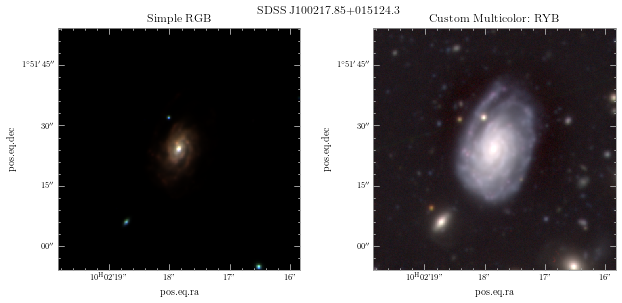

In [10]:
# --> Rather than re-scale each original image, just take one of the greyRGB frames from each
gal_pureRGB=np.dstack([g_greyRGB[:,:,0],r_greyRGB[:,:,0],i_greyRGB[:,:,0]])

mcf.comparemulticolorRGB_pureRGB(gal_pureRGB, gal_merian, gal_icrophdr, 
    'Custom Multicolor: RYB',"SDSS J100217.85+015124.3", './gal_compare.jpg', tickcolor='0.6', supy=.75)

#mcf.saveRGBfits('./gal_color_images_merian.fits', gal_merian, gal_gcrophdr)